Naive Bayes Classifier:

The Naive Bayes algorithm is a probabilistic classifier based on Bayes' Theorem. It assumes that the features (independent variables) are conditionally independent, which is why it's called "naive." Even though this assumption rarely holds true in real-world data, Naive Bayes often performs surprisingly well for many types of classification problems.
Types of Naive Bayes Classifiers:

There are three types of Naive Bayes classifiers, each used depending on the nature of the data:

    Gaussian Naive Bayes: Assumes that the features are normally distributed (continuous data).
    Multinomial Naive Bayes: Suitable for discrete data (e.g., word counts in text classification).
    Bernoulli Naive Bayes: Suitable for binary/boolean features.

Missing values in dataset: survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
adult_male    0
alone         0
dtype: int64

Data Types:
 pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked    float64
dtype: object
Error while fitting the model: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#es

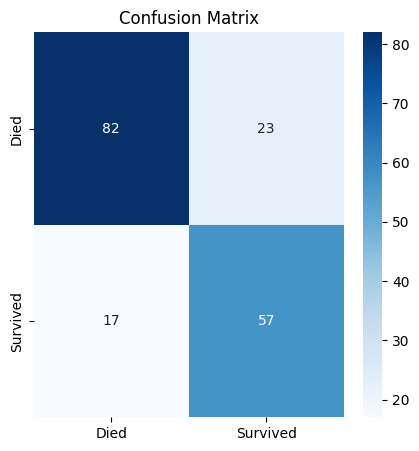


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179


Example Prediction (Survived=1, Died=0): [1]


In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
warnings.filterwarnings("ignore")

# Step 1: Load Titanic dataset
df = sns.load_dataset('titanic')

# Step 2: Data Preprocessing
df.drop(columns=['who', 'deck', 'embark_town', 'alive', 'class'], inplace=True)  # Drop unnecessary columns
df['age'].fillna(df['age'].median(), inplace=True)  # Fill missing 'age' with median
df['fare'].fillna(df['fare'].median(), inplace=True)  # Fill missing 'fare' with median

# Check for missing values in the dataset
print("Missing values in dataset:", df.isnull().sum())

# Encode 'sex' and 'embarked' as numeric values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Male=0, Female=1
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # C=0, Q=1, S=2

# Drop rows with missing 'survived' values
df.dropna(subset=['survived'], inplace=True)

# Step 3: Prepare features and target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

# Check data types to ensure features are numeric
print("\nData Types:\n", X.dtypes)

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Naive Bayes model
try:
    model = GaussianNB().fit(X_train, y_train)
except ValueError as e:
    print(f"Error while fitting the model: {e}")

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 8: Confusion Matrix Chart
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

# Step 9: Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Example Prediction
example_data = [[1, 0, 22, 1, 0, 7.25, 0]]  # Example data
example_prediction = model.predict(example_data)
print("\nExample Prediction (Survived=1, Died=0):", example_prediction)


In [44]:
# Example: Predict survival for a single passenger
example_data = [[1, 0, 22, 1, 0, 7.25, 0]]  # Example data for pclass, sex, age, sibsp, parch, fare, embarked
example_prediction = model.predict(example_data)
print(f"Prediction (1 = Survived, 0 = Died): {example_prediction[0]}")


Prediction (1 = Survived, 0 = Died): 1


In [45]:
# Example: Predict survival for a DataFrame of samples
import pandas as pd

# Create a DataFrame
data = pd.DataFrame({
    'pclass': [1, 3, 2],
    'sex': [0, 1, 0],
    'age': [22, 28, 35],
    'sibsp': [1, 0, 0],
    'parch': [0, 0, 0],
    'fare': [7.25, 13.0, 10.5],
    'embarked': [0, 2, 1]
})

# Make predictions
predictions = model.predict(data)
print(f"Predictions for DataFrame (1 = Survived, 0 = Died): {predictions}")


Predictions for DataFrame (1 = Survived, 0 = Died): [1 1 0]
